# 2DI70 Statistical Learning Theory 
## Assignment 1

### Group x
Name1 ID1

Name2 ID2

Name3 ID3

In [1]:
# Imports here
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import numpy as np
import operator


#### Load MNIST data from csv files

In [2]:
train_small = pd.read_csv("MNIST_train_small.csv").values
test_small  = pd.read_csv("MNIST_test_small.csv").values

In [3]:
## Normalizing the data is probably not necessary for this specific dataset
X_train_s = train_small[:, 1:]/255.0
y_train_s = train_small[:,0]

X_test_s = test_small[:, 1:]/255.0
y_test_s = test_small[:,0]

#### Define functions

In [4]:
## Render chosen data point as image
def show_img(data, index):
    plt.imshow(data[index].reshape(28,28), cmap = "Greys")
    plt.show()

In [5]:
## Compute the nth root of given value
def n_root(val, p):   
    return val**(1 / float(p))
  
## Compute Minkowski distance for two given vectors
## Use p = 2 for Euclidian distance
def minkowski_dist(x1, x2, p):    
    p_sum = sum(pow(abs(a-b), p) for a, b in zip(x1, x2))
    return n_root(p_sum, p) 
  
v1 = X_train_s[0]
v2 = X_train_s[1]
print(minkowski_dist(v1, v2, 2)) 

8.617445178210408


In [6]:
## Compute p-minkowski distance from point to every datapoint in collection
## The list of labels should share length and indices with collection
def compute_dists(point, collection, labels, p):
    vals = []
    for i in range(len(collection)):
        d = minkowski_dist(point, collection[i], p)
        vals.append([i, d, labels[i]])
    
    return vals

#### Do KNN magic

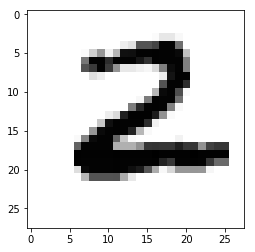

In [7]:
## Compute knn for example data
show_img(X_test_s, 0)
dists1 = compute_dists(X_test_s[0], X_train_s, y_train_s, 2)

In [8]:
## Since the point we selected is in the training set, it shows up in the list with a distance of 0
## In this case, we can confidently say it is a 3
dists1_sorted = sorted(dists1, key = lambda x: float(x[1]))
dists1_sorted[0:20]

[[1135, 5.3865168364513, 2],
 [2930, 6.176237779614883, 2],
 [1839, 6.359115856708896, 2],
 [2931, 6.971545396350763, 2],
 [1673, 7.1679066012479415, 2],
 [1745, 7.241429992960301, 2],
 [674, 7.360805206442928, 2],
 [1959, 7.46974314606631, 2],
 [2869, 7.472301795139638, 2],
 [1058, 7.590140106469208, 2],
 [394, 7.816389685297066, 2],
 [20, 7.866137843152389, 2],
 [535, 7.8670723020162905, 2],
 [1936, 7.948569785196725, 2],
 [1146, 7.982502009483685, 2],
 [402, 8.022200070046882, 2],
 [2694, 8.041375128432373, 2],
 [1943, 8.087366085202186, 2],
 [629, 8.16194129232512, 2],
 [2707, 8.167651236462792, 2]]

In [25]:
import time

In [27]:
#Predefine top k value, length range r of test data to select
distsasd=[]
k = 20
r = len(X_train_s)
#r=500
error = 0
ti=time.time()
percent_error = error/r
#for each x in test set, compute the distance with all x in training set, then sort in distance for top 20 nearest neighbors
for i in range(r):
    dists = compute_dists(X_train_s[i], X_train_s, y_train_s, 2)
    dists_sorted = sorted(dists, key = lambda x: float(x[1]))
    list2 = dists_sorted[1:k+1] #get list top 20 nearest neighbors with its [index,distance,label] 
    distsasd.append(list2)
    if(i%50==0):
        print("done",i)
        print(time.time()-ti)
        ti=time.time()
#count frequency of labels of the top 20 nearest neighbors

    


done 0
1.6305036544799805
done 50
85.89391541481018
done 100
85.89846777915955
done 150
83.66302371025085
done 200
88.08206915855408
done 250
90.89964628219604
done 300
80.372243642807
done 350
82.01828598976135
done 400
81.8510012626648
done 450
81.62596487998962
done 500
85.4732096195221
done 550
81.96734285354614
done 600
81.35711979866028
done 650
82.25699758529663
done 700
82.2536997795105
done 750
81.71692442893982
done 800
82.69104170799255
done 850
82.68295407295227
done 900
81.62103819847107
done 950
81.71001982688904
done 1000
82.28503274917603
done 1050
82.31398415565491
done 1100
82.29399585723877
done 1150
82.21207451820374
done 1200
81.89699721336365
done 1250
82.45198607444763
done 1300
82.51900553703308
done 1350
81.55064082145691
done 1400
81.24995994567871
done 1450
85.08300161361694
done 1500
80.85600686073303
done 1550
81.54288339614868
done 1600
81.96965837478638
done 1650
81.33677649497986
done 1700
80.87193870544434
done 1750
81.3222873210907
done 1800
81.9412105

In [78]:
#Find average error for given k using 1/0-loss function
def calcerror(k, y):
    r=0
    errors=0
    for j in range(len(distsasd)):
        pop=0
        labels = np.zeros(10)
        ks = distsasd[j][:k]
        #print(ks)
        #print(y_train_s[ks[0][2]])
        for l in range(k):
            pop+=1
            labels[[ks[l][2]]] += 1
        #print(labels)    
        prediction = np.argmax(labels)
        #print(prediction)
        if (y[j] != prediction):
            errors +=1
        r += 1 
    #print(pop)
    #print(errors)    
    return errors/r

In [79]:
distsasd[1][:5][0][2]

4

In [81]:
for k in range(1,21):
    print(calcerror(k, y_train_s))

0.08069356452150717
0.08869623207735912
0.07869289763254418
0.07902634211403801
0.0800266755585195
0.08302767589196398
0.08336112037345782
0.08936312104034679
0.08769589863287762
0.09003001000333445
0.09203067689229744
0.09436478826275425
0.09503167722574192
0.09436478826275425
0.0960320106702234
0.09836612204068022
0.09736578859619874
0.10036678892964321
0.09903301100366789
0.10103367789263087
